# Построение и анализ моделей беспроводных сетей 5G/6G
## Практическая работа №4
### Антенные решетки

Быстров Глеб Андреевич
НФИмд-01-24
1132249517

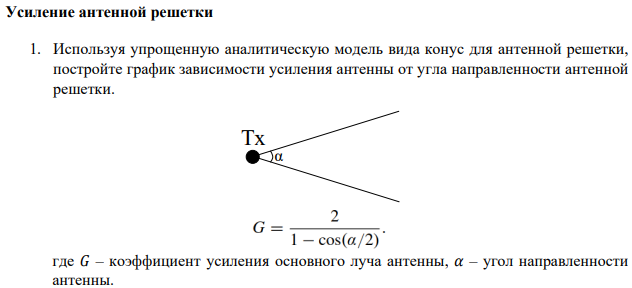

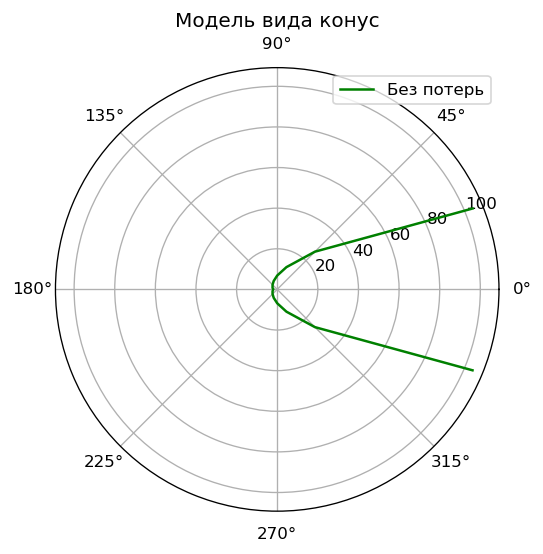

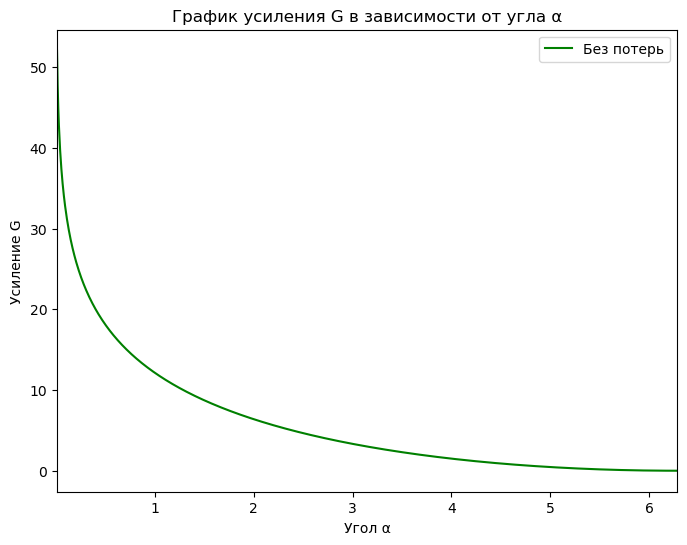

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def convert_to_db(value):
    return 10 * np.log10(value)

angle_range = np.arange(-np.pi, np.pi, np.pi / 8)

def gain_model(alpha):
    return 2 / (1 - np.cos(alpha / 2))

plt.figure(dpi=120)
plt.polar(angle_range, [gain_model(angle) for angle in angle_range], color='green', label='Без потерь')
plt.title('Модель вида конус')
plt.legend()
plt.show()

alpha_values = np.linspace(0.01, 2 * np.pi, 1000)
gain_values = [gain_model(alpha) for alpha in alpha_values]

plt.figure(figsize=(8, 6))
plt.plot(alpha_values, [convert_to_db(g) for g in gain_values], color='green', label='Без потерь')
plt.title("График усиления G в зависимости от угла α")
plt.xlabel("Угол α")
plt.ylabel("Усиление G")
plt.xlim(alpha_values[0], alpha_values[-1])
plt.legend()
plt.show()

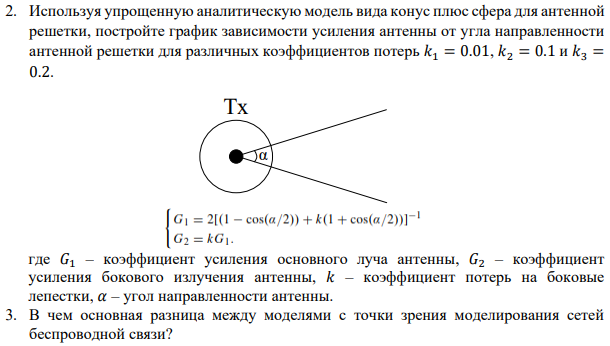

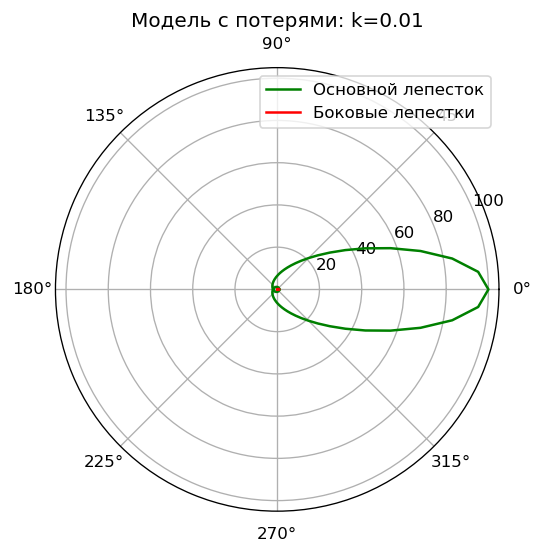

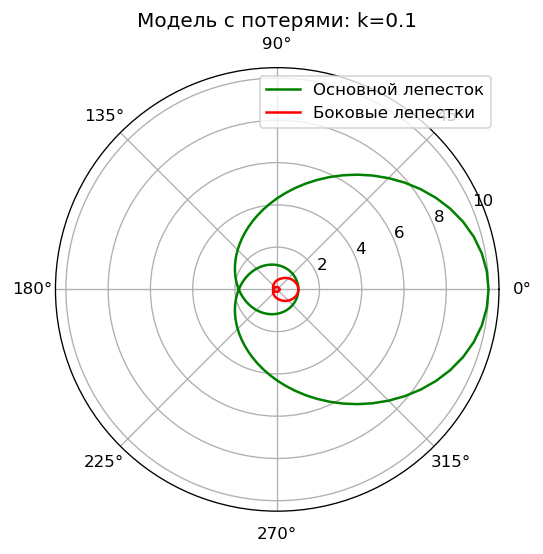

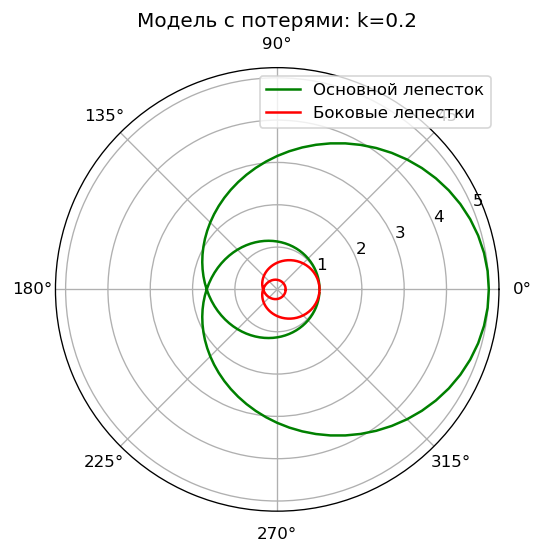

In [58]:
def calculate_gain_with_losses(alpha, loss_factor):
    primary_beam = 2 * ((1 - np.cos(alpha / 2)) + loss_factor * (1 + np.cos(alpha / 2))) ** -1
    side_lobes = loss_factor * primary_beam
    return primary_beam, side_lobes

angle_range_losses = np.arange(-2 * np.pi, 2 * np.pi, np.pi / 36)

loss_factors = [0.01, 0.1, 0.2]
for loss_factor in loss_factors:
    plt.figure(dpi=120)
    gains = calculate_gain_with_losses(angle_range_losses, loss_factor)
    plt.polar(angle_range_losses, gains[0], color='green', label='Основной лепесток')
    plt.polar(angle_range_losses, gains[1], color='red', label='Боковые лепестки')
    plt.title(f'Модель с потерями: k={loss_factor}')
    plt.legend()
    plt.show()

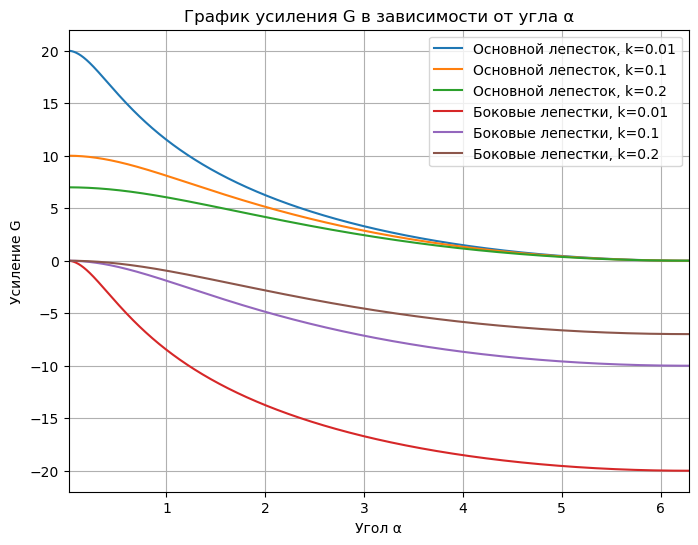

In [53]:
alpha_values = np.linspace(0.01, 2 * np.pi, 1000)

gain_without_losses = [gain_model(alpha) for alpha in alpha_values]
gains_main_lobe = {k: [] for k in loss_factors}
gains_side_lobe = {k: [] for k in loss_factors}

for alpha in alpha_values:
    for k in loss_factors:
        primary, side = calculate_gain_with_losses(alpha, k)
        gains_main_lobe[k].append(primary)
        gains_side_lobe[k].append(side)
        
plt.figure(figsize=(8, 6))

for k in loss_factors:
    plt.plot(alpha_values, [convert_to_db(g) for g in gains_main_lobe[k]],
             label=f'Основной лепесток, k={k}')

for k in loss_factors:
    plt.plot(alpha_values, [convert_to_db(g) for g in gains_side_lobe[k]],
             label=f'Боковые лепестки, k={k}')

plt.title("График усиления G в зависимости от угла α")
plt.xlabel("Угол α")
plt.ylabel("Усиление G")
plt.xlim(alpha_values[0], alpha_values[-1])
plt.legend()
plt.grid(True)
plt.show()

Основная разница между моделями заключается в учёте потерь сигнала. Модель без потерь описывает идеализированную антенну, где усиление зависит только от угла направления антенны. Она подходит для анализа в теоретических условиях, где помехи игнорируются, и вся энергия сосредоточена в главном лепестке. Модель с потерями более сложная, так как учитывает коэффициент потерь, описывающий утечку энергии в боковые лепестки и ослабление сигнала. Эта модель реалистичнее, поскольку позволяет анализировать работу антенны в реальных условиях беспроводной связи, где присутствуют помехи и многолучевое распространение.

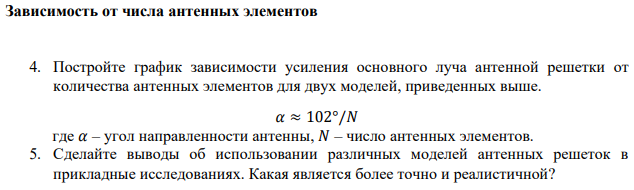

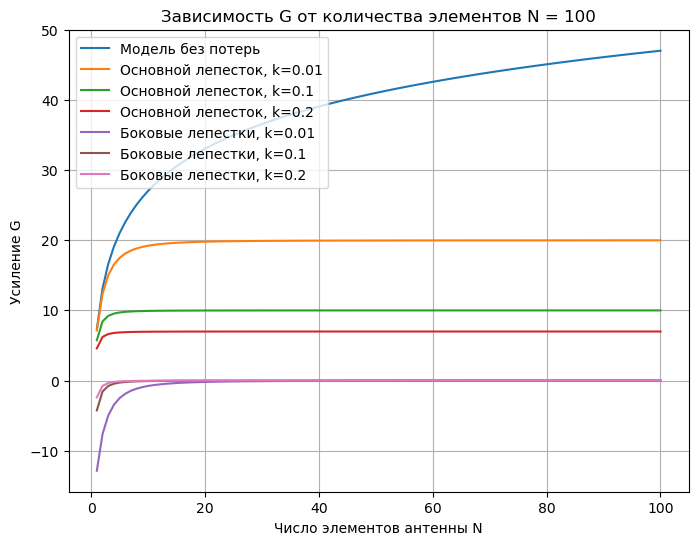

In [54]:
N_values = np.arange(1, 101, 1)

gain_without_losses = []
gains_main_lobe = {k: [] for k in loss_factors}
gains_side_lobe = {k: [] for k in loss_factors}

for N in N_values:
    alpha = np.radians(102 / N)
    gain_without_losses.append(gain_model(alpha))
    for k in loss_factors:
        primary, side = calculate_gain_with_losses(alpha, k)
        gains_main_lobe[k].append(primary)
        gains_side_lobe[k].append(side)

plt.figure(figsize=(8, 6))

plt.plot(N_values, [convert_to_db(g) for g in gain_without_losses], label='Модель без потерь')

for k in loss_factors:
    plt.plot(N_values, [convert_to_db(g) for g in gains_main_lobe[k]],
             label=f'Основной лепесток, k={k}')

for k in loss_factors:
    plt.plot(N_values, [convert_to_db(g) for g in gains_side_lobe[k]],
             label=f'Боковые лепестки, k={k}')

plt.title("Зависимость G от количества элементов N = 100")
plt.xlabel("Число элементов антенны N")
plt.ylabel("Усиление G")
plt.legend()
plt.grid(True)
plt.show()

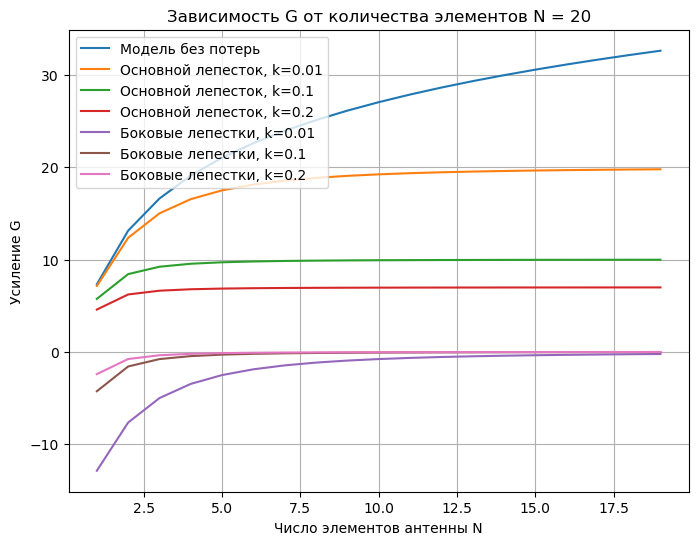

In [55]:
N_values = np.arange(1, 20, 1)

gain_without_losses = []
gains_main_lobe = {k: [] for k in loss_factors}
gains_side_lobe = {k: [] for k in loss_factors}

for N in N_values:
    alpha = np.radians(102 / N)
    gain_without_losses.append(gain_model(alpha))
    for k in loss_factors:
        primary, side = calculate_gain_with_losses(alpha, k)
        gains_main_lobe[k].append(primary)
        gains_side_lobe[k].append(side)

plt.figure(figsize=(8, 6))

plt.plot(N_values, [convert_to_db(g) for g in gain_without_losses], label='Модель без потерь')

for k in loss_factors:
    plt.plot(N_values, [convert_to_db(g) for g in gains_main_lobe[k]],
             label=f'Основной лепесток, k={k}')

for k in loss_factors:
    plt.plot(N_values, [convert_to_db(g) for g in gains_side_lobe[k]],
             label=f'Боковые лепестки, k={k}')

plt.title("Зависимость G от количества элементов N = 20")
plt.xlabel("Число элементов антенны N")
plt.ylabel("Усиление G")
plt.legend()
plt.grid(True)
plt.show()

Модель с потерями является более точной и реалистичной для прикладных исследований, так как учитывает физические явления, которые имеют место в реальных беспроводных сетях. Она лучше подходит для оптимизации дизайна антенн и оценки их эффективности. Однако модель без потерь остаётся полезной на начальных этапах проектирования, где требуется быстрое и простое моделирование. 

Для достижения наиболее точных результатов в прикладных исследованиях рекомендуется комбинировать обе модели: использовать модель без потерь для начального анализа и переходить к модели с потерями для более глубокого изучения.